## Prediction of Obesity Type using People's Habits

### Necessary Libraries

In [42]:
#Importing Libraries
import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV;
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier;
from xgboost import XGBClassifier;
from sklearn.svm import SVC
from tqdm.notebook import tqdm;

### Importing Data

In [43]:
#Getting Directory of file dynamically
current_directory = os.getcwd()
input_path = os.path.join(current_directory, '..', 'input')
output_path = os.path.join(current_directory, '..', 'output')

#Reading CSV Files
train_data = pd.read_csv(f'{input_path}/train.csv')
test_data = pd.read_csv(f'{input_path}/test.csv')

In [44]:
#Checking Null Values
print(f'Train Set - Null Values: \n{train_data.isna().sum()}')

Train Set - Null Values: 
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [45]:
print(f'Test Set - Null Values: \n{train_data.isna().sum()}')

Test Set - Null Values: 
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [46]:
train_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [47]:
#Statistics of Data
train_data.describe().transpose

<bound method DataFrame.transpose of                 id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min 

### EDA: Data Visualization

In [48]:
plot_data = train_data.copy()
train_data.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


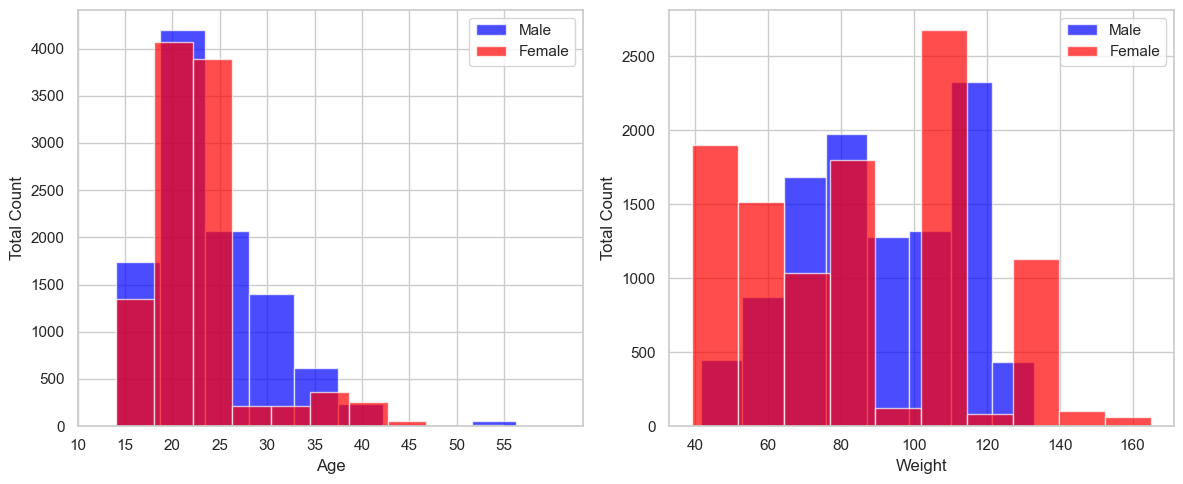

In [49]:
#Plotting Gender dsitrbution among Age and Weight
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for ages
axs[0].hist(plot_data[plot_data['Gender'] == 'Male']['Age'], color='blue', alpha=0.7, label='Male')
axs[0].hist(plot_data[plot_data['Gender'] == 'Female']['Age'], color='red', alpha=0.7, label='Female')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Total Count')
axs[0].set_xticks(np.arange(10,60,5))
axs[0].legend()

# Plot histogram for weights
axs[1].hist(plot_data[plot_data['Gender'] == 'Male']['Weight'], color='blue', alpha=0.7, label='Male')
axs[1].hist(plot_data[plot_data['Gender'] == 'Female']['Weight'], color='red', alpha=0.7, label='Female')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('Total Count')
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

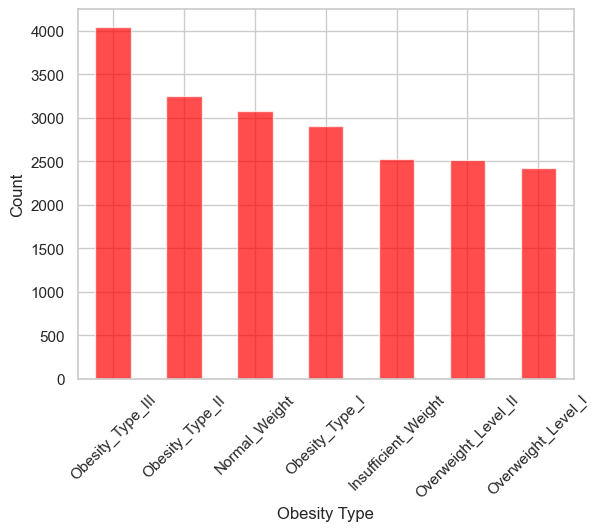

In [50]:
#Count of Labels in our dataset
#This shows balanced dataset
plot_data['NObeyesdad'].value_counts().plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Obesity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

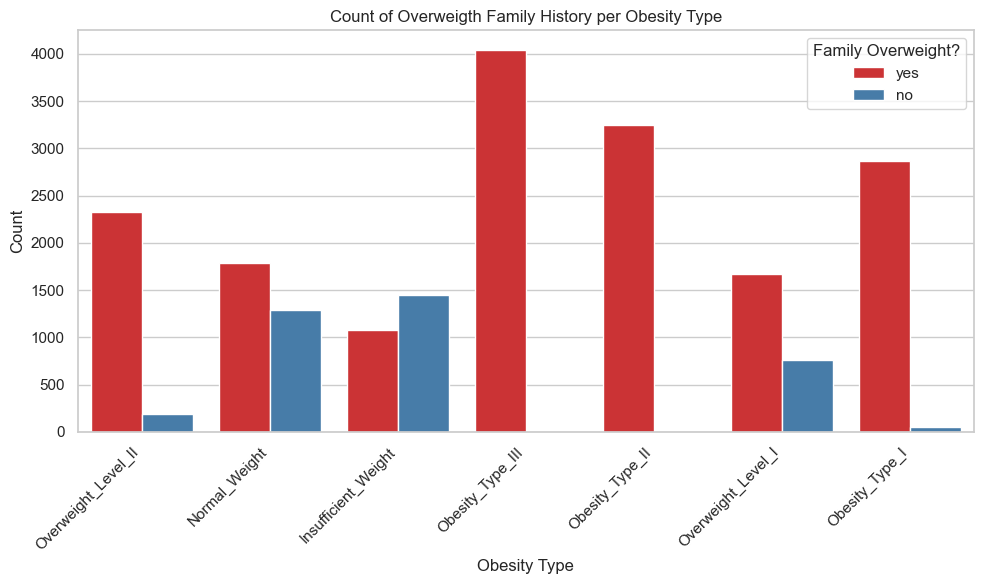

In [51]:
sns.set_theme(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=plot_data, palette='Set1')
plt.title('Count of Overweigth Family History per Obesity Type')
plt.xlabel('Obesity Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Family Overweight?')
plt.tight_layout()
plt.show()

### Feature Engineering

In [52]:
df = pd.concat([train_data,test_data], axis=0, ignore_index=True)
df.reset_index(drop=True,inplace=True)

In [53]:
#Converting Age into categories
age_category = pd.cut(df.Age, bins=[0,19,30,40,70], labels=['Teen','Young_Adult','Adult','Elderly'],ordered=False)
df.insert(3,'Age_Group',age_category)

In [54]:
#Calculating BMI using Height and Weight
bmi = df.Weight / (df.Height)**2
pd.DataFrame(bmi, columns=['BMI'])
bmi_category = pd.cut(bmi, bins=[0,18.5,24.9,29.9,60], labels=['Underweight','Normal_Weight','Overweight','Obese'])
df.insert(6,'BMI',bmi_category)

In [55]:
#Converting Gender to Categorical
df['Gender'] = df['Gender'].astype('category')

In [56]:
#Rounding up Number of Main Meals
for index, data in enumerate(df['NCP']):
    if data >= 1.0 and data <=1.50:
        df.loc[index, 'NCP'] = 1.0
    elif data > 1.50 and data <=2.0:
        df.loc[index, 'NCP'] = 2.0
    elif data > 2.0 and data <=2.50:
        df.loc[index, 'NCP'] = 2.0
    elif data > 2.50 and data <=3.0:
        df.loc[index, 'NCP'] = 3.0
    else:
        df.loc[index, 'NCP'] = 4.0


In [57]:
#Converting FAF column to category
gym_category = pd.cut(df.FAF, bins=[0.0,0.5,2.0,3.0], labels=['Low','Mid','High'],ordered=True)
df.insert(17,'FAF_Level',gym_category)

In [58]:
#Filled missed values
df['FAF_Level'].fillna('Low', inplace=True)

/var/folders/22/bf4_mcm93tv3vmh7w13_jvrh0000gn/T/ipykernel_56001/3270670828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FAF_Level'].fillna('Low', inplace=True)


In [59]:
#Categorizing Consumption of Alcohol
for index, alc in enumerate(df['CALC']):
    if alc in 'no':
        df.loc[index, 'CALC'] = 'None'
    elif alc in 'Sometimes':
        df.loc[index, 'CALC'] = 'Low'
    else:
        df.loc[index, 'CALC'] = 'High'
        

In [60]:
#Converting CALC into categorical
df['CALC'] = pd.Categorical(df['CALC'], categories=['None','Low','High'], ordered=True)


In [61]:
#Converting family_history into categorical
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype('bool')

### Model Training

In [62]:
#Training and Testing Data
classify_data = df.copy()

classify_data.dtypes


id                                   int64
Gender                            category
Age                                float64
Age_Group                         category
Height                             float64
Weight                             float64
BMI                               category
family_history_with_overweight        bool
FAVC                                object
FCVC                               float64
NCP                                float64
CAEC                                object
SMOKE                               object
CH2O                               float64
SCC                                 object
FAF                                float64
TUE                                float64
FAF_Level                         category
CALC                              category
MTRANS                              object
NObeyesdad                          object
dtype: object

In [63]:
#Ordinal Columns: BMI, FAF_Level, CALC
bmi_encoder = OrdinalEncoder(categories=[['Underweight', 'Normal_Weight', 'Overweight', 'Obese']])
faf_encoder = OrdinalEncoder(categories=[['Low', 'Mid', 'High']])
calc_encoder = OrdinalEncoder(categories=[['None', 'Low', 'High']])
obesity_encoder = LabelEncoder()

classify_data['BMI_labeled'] = bmi_encoder.fit_transform(classify_data[['BMI']])
classify_data['FAF_Level_labeled'] = faf_encoder.fit_transform(classify_data[['FAF_Level']])
classify_data['CALC_labeled'] = calc_encoder.fit_transform(classify_data[['CALC']])
classify_data['NObeyesdad'] = obesity_encoder.fit_transform(classify_data['NObeyesdad'])

classify_data['BMI_labeled'] = classify_data['BMI_labeled'].astype('int')
classify_data['FAF_Level_labeled'] = classify_data['FAF_Level_labeled'].astype('int')
classify_data['CALC_labeled'] = classify_data['CALC_labeled'].astype('int')
classify_data['NObeyesdad'] = classify_data['NObeyesdad'].astype('int')




In [64]:
#Nominal Columns: Gender, Age_Group
gender_encoded = pd.get_dummies(classify_data['Gender'], prefix='gender')
age_encoded = pd.get_dummies(classify_data['Age_Group'], prefix='age')

classify_data = pd.concat([classify_data, gender_encoded, age_encoded], axis=1)

In [65]:
classify_train = classify_data.iloc[:len(train_data)].reset_index(drop=True)
classify_test = classify_data.iloc[len(train_data):].reset_index(drop=True)

print(classify_train.shape,classify_test.shape)

(20758, 30) (13840, 30)


In [68]:
#Splitting into X_train and y_train
X_train = classify_train.drop(['id','Gender','age_Teen', 'age_Young_Adult', 'age_Adult' ,'age_Elderly' ,'Age_Group','Height','BMI','Weight','FAVC','CAEC','SMOKE','SCC','FAF','MTRANS','NObeyesdad','FAF_Level','CALC'], axis=1)
y_train = classify_train[['NObeyesdad']]

y_train2d = y_train.values
y_train = y_train2d.ravel()
print(X_train.shape,y_train.shape)


(20758, 11) (20758,)


In [67]:
classify_data[:5]

,id,Gender,Age,Age_Group,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,...,NObeyesdad,BMI_labeled,FAF_Level_labeled,CALC_labeled,gender_Female,gender_Male,age_Teen,age_Young_Adult,age_Adult,age_Elderly
0,0,Male,24.443011,Young_Adult,1.699998,81.669950,Overweight,True,yes,2.000000,...,6,2,0,1,False,True,False,True,False,False
1,1,Female,18.000000,Teen,1.560000,57.000000,Normal_Weight,True,yes,2.000000,...,1,1,1,0,True,False,True,False,False,False
2,2,Female,18.000000,Teen,1.711460,50.165754,Underweight,True,yes,1.880534,...,0,0,1,0,True,False,True,False,False,False
3,3,Female,20.952737,Young_Adult,1.710730,131.274851,Obese,True,yes,3.000000,...,4,3,1,1,True,False,False,True,False,False
4,4,Male,31.641081,Adult,1.914186,93.798055,Overweight,True,yes,2.679664,...,6,2,1,1,False,True,False,False,True,False


In [69]:
X_train.dtypes

Age                               float64
family_history_with_overweight       bool
FCVC                              float64
NCP                               float64
CH2O                              float64
TUE                               float64
BMI_labeled                         int64
FAF_Level_labeled                   int64
CALC_labeled                        int64
gender_Female                        bool
gender_Male                          bool
dtype: object

In [70]:
#'id','Age','Gender','Age_Group','Height','BMI','Weight','FAVC','CAEC','SMOKE','SCC','FAF','MTRANS','NObeyesdad','FAF_Level','CALC'
#Creating Test Sets 
X_test = classify_test.drop(['id','Gender','age_Teen', 'age_Young_Adult', 'age_Adult' ,'age_Elderly' ,'Age_Group','Height','BMI','Weight','FAVC','CAEC','SMOKE','SCC','FAF','MTRANS','NObeyesdad','FAF_Level','CALC'], axis=1)
y_test = classify_test[['id','NObeyesdad']]
print(X_test.shape,y_test.shape)

(13840, 11) (13840, 2)


In [71]:
#Creating a directory for storing models and hyoer-parameters
model_dict = \
{
'SVC': [SVC(random_state = 10), {'C': range(3,10,1)}],
'DTree' : [DecisionTreeClassifier(random_state= 10), {'max_depth': range(4,8,1), 'min_samples_leaf' : range(3,12,1)}],
'RandomForest': [RFC(random_state =10), 
                 {'n_estimators': range(50,300,25), 'max_depth': range(4,7,1)}],
'GBM': [GradientBoostingClassifier(random_state= 10), {'max_depth' : range(2,6,1)}],
'XgBoost': [XGBClassifier(eval_metric= 'logloss'), {}]
};

cv = None

# Creating model output storage objects:-
model_metrics = pd.DataFrame(data= None, index= list(model_dict.keys()), dtype= np.float32,
                             columns= ['Accuracy_Score']);
model_predictions = pd.DataFrame(data= None, index= None, columns= None);

In [72]:
#Implementing all models and finding out best model based on accuracy using GridSearchCV:
for model_label, model_param in tqdm(model_dict.items()):
    print(f"\nCurrent model is {model_label}")
    grid = GridSearchCV(estimator = model_param[0], param_grid = model_param[1], scoring='accuracy', refit=True, cv=cv);
    grid.fit(X_train, y_train);
    print(f"""Best estimator is \n{grid.best_estimator_}\n""")
    
    ytrain_pred = grid.predict(X_train);
    
    model_metrics.loc[model_label] = (
                                  accuracy_score(y_train, ytrain_pred)
                                 );
    
    model_predictions = pd.concat((model_predictions,pd.DataFrame(grid.predict(X_test), index = X_test.index, columns = [model_label])),
                             axis= 1, join='outer');

print(f"\n\nTraining set scores across models:-\n")
display(model_metrics.style.format('{:.2%}'));


  0%|          | 0/5 [00:00<?, ?it/s]


Current model is SVC
Best estimator is 
SVC(C=9, random_state=10)



/var/folders/22/bf4_mcm93tv3vmh7w13_jvrh0000gn/T/ipykernel_56001/3817762429.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8171307447730995' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  model_metrics.loc[model_label] = (



Current model is DTree
Best estimator is 
DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, random_state=10)


Current model is RandomForest
Best estimator is 
RandomForestClassifier(max_depth=6, n_estimators=75, random_state=10)


Current model is GBM
Best estimator is 
GradientBoostingClassifier(max_depth=4, random_state=10)


Current model is XgBoost
Best estimator is 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
           

,Accuracy_Score
SVC,81.71%
DTree,83.90%
RandomForest,83.63%
GBM,87.54%
XgBoost,91.62%


In [73]:
model_predictions[:]

,SVC,DTree,RandomForest,GBM,XgBoost
0,3,3,3,3,3
1,5,5,5,5,5
2,4,4,4,4,4
3,2,2,2,2,2
4,4,4,4,4,4
...,...,...,...,...,...
13835,6,6,6,5,6
13836,1,1,1,1,1
13837,0,0,0,0,0
13838,1,1,1,1,1


In [74]:
label_mapping = dict(zip(obesity_encoder.transform(obesity_encoder.classes_), obesity_encoder.classes_))
label_mapping

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 3: 'Obesity_Type_II',
 4: 'Obesity_Type_III',
 5: 'Overweight_Level_I',
 6: 'Overweight_Level_II',
 7: nan}

In [75]:
model_predictions['Xgboost_labels'] = model_predictions['XgBoost'].map(label_mapping)

In [76]:
model_predictions

,SVC,DTree,RandomForest,GBM,XgBoost,Xgboost_labels
0,3,3,3,3,3,Obesity_Type_II
1,5,5,5,5,5,Overweight_Level_I
2,4,4,4,4,4,Obesity_Type_III
3,2,2,2,2,2,Obesity_Type_I
4,4,4,4,4,4,Obesity_Type_III
...,...,...,...,...,...,...
13835,6,6,6,5,6,Overweight_Level_II
13836,1,1,1,1,1,Normal_Weight
13837,0,0,0,0,0,Insufficient_Weight
13838,1,1,1,1,1,Normal_Weight


In [77]:
#Appending IDs to y_pred to matach submission format
y_pred = pd.concat([classify_test['id'],model_predictions['Xgboost_labels']],axis=1)
y_pred.columns = y_test.columns
y_pred


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [78]:
#Saving the Prediction in a CSV format
y_pred.to_csv(f'{output_path}/submission.csv', index=False)